In [179]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
# Importing dataset

import_df = pd.read_csv(r'D:\Prot\Data Analyst\UM selected projects\I_Road Accident\Road Accident.csv')

In [181]:
# Creating copy of the original dataframe

road_accident_df = import_df.copy()

In [182]:
# Querying for 1st 5 rows

road_accident_df[:5]

,City_Name,Cause_Category,Cause_Subcategory,Outcome_of_Incident,Count_in_mil
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


In [183]:
# Querying for missing values

road_accident_df.isnull().sum()

City_Name              0
Cause_Category         0
Cause_Subcategory      0
Outcome_of_Incident    0
Count_in_mil           0
dtype: int64

In [184]:
# Summary of the dataset

road_accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City_Name            9550 non-null   object 
 1   Cause_Category       9550 non-null   object 
 2   Cause_Subcategory    9550 non-null   object 
 3   Outcome_of_Incident  9550 non-null   object 
 4   Count_in_mil         9550 non-null   float64
dtypes: float64(1), object(4)
memory usage: 373.2+ KB


In [185]:
# Analysing total number of rows and columns

road_accident_df.shape

(9550, 5)

In [186]:
# Checking for duplicate values

road_accident_df[road_accident_df.duplicated()]

,City_Name,Cause_Category,Cause_Subcategory,Outcome_of_Incident,Count_in_mil


* There is no duplicate values.

In [188]:
# Statistical summary

road_accident_df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
City_Name,9550,50,Agra,191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cause_Category,9550,6,Road Features,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cause_Subcategory,9550,35,Others,1450,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outcome_of_Incident,9550,5,Greviously Injured,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Count_in_mil,9550.0,NaN,NaN,NaN,103.595079,275.1522,0.0,0.0,12.0,70.0,3148.0


In [189]:
# Querying total number of unique cities

road_accident_df['City_Name'].unique()

array(['Agra', 'Ahmedabad', 'Allahabad(Prayagraj)', 'Amritsar',
       'Asansol Durgapur', 'Aurangabad', 'Bengaluru', 'Bhopal',
       'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi', 'Dhanbad',
       'Faridabad', 'Ghaziabad', 'Gwalior', 'Hyderabad', 'Indore',
       'Jabalpur', 'Jaipur', 'Jamshedpur', 'Jodhpur', 'Kannur', 'Kanpur',
       'Khozikode', 'Kochi', 'Kolkata', 'Kollam', 'Kota', 'Lucknow',
       'Ludhiana', 'Madurai', 'Mallapuram', 'Meerut', 'Mumbai', 'Nagpur',
       'Nashik', 'Patna', 'Pune', 'Raipur', 'Rajkot', 'Srinagar', 'Surat',
       'Thiruvanthapuram', 'Thrissur', 'Tiruchirapalli', 'Vadodra',
       'Varanasi', 'Vijaywada city', 'Vizaq'], dtype=object)

* These are some cities based on which further analysis has been done.

In [191]:
# Querying the top 6 most frequent Cause_Category

road_accident_df['Cause_Category'].value_counts()

Cause_Category
Road Features               2000
Impacting Vehicle/Object    1800
Traffic Control             1500
Junction                    1500
Traffic Violation           1500
Weather                     1250
Name: count, dtype: int64

* These are some frequent cause of accidents.

In [193]:
# Total accidents

road_accident_df['Count_in_mil'].sum()

989333.0

In [194]:
# Querying for data where persons got killed

road_accident_df[road_accident_df['Outcome_of_Incident'] == 'Persons Killed']

,City_Name,Cause_Category,Cause_Subcategory,Outcome_of_Incident,Count_in_mil
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
7,Agra,Traffic Control,Others,Persons Killed,373.0
12,Agra,Traffic Control,Police Controlled,Persons Killed,0.0
17,Agra,Traffic Control,Stop Sign,Persons Killed,0.0
22,Agra,Traffic Control,Traffic Light Signal,Persons Killed,18.0
...,...,...,...,...,...
9527,Vizaq,Weather,Foggy and Misty,Persons Killed,7.0
9532,Vizaq,Weather,Hail/Sleet,Persons Killed,0.0
9537,Vizaq,Weather,Others,Persons Killed,68.0
9542,Vizaq,Weather,Rainy,Persons Killed,4.0


In [195]:
# Querying for total accidents per city

accidents_city = road_accident_df.groupby('City_Name').agg(Total_Accidents = ('Count_in_mil','sum'))\
                                .sort_values(by = 'Total_Accidents',ascending = False)
accidents_city[:10]

,Total_Accidents
City_Name,
Chennai,78459.0
Delhi,72526.0
Jabalpur,57715.0
Bengaluru,53535.0
Indore,50098.0
Bhopal,35069.0
Hyderabad,34720.0
Jaipur,32524.0
Mallapuram,32294.0


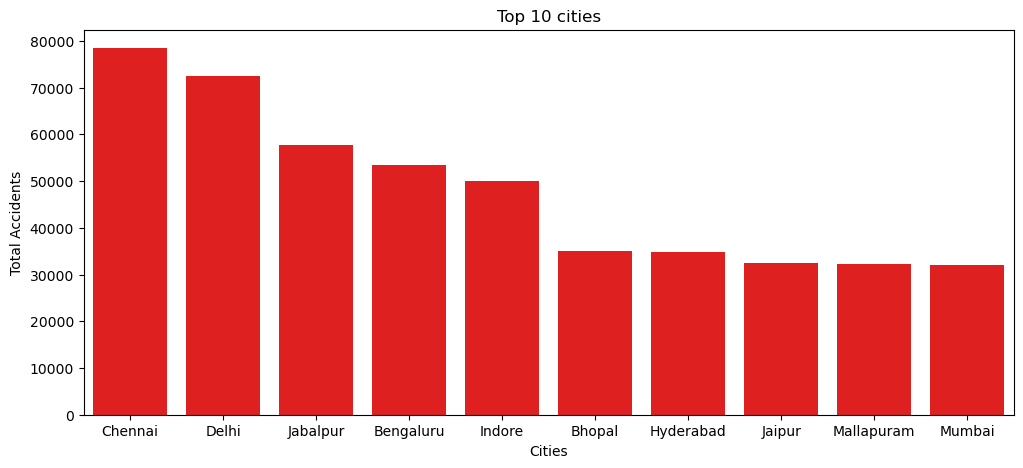

In [196]:
# Plotting the above

top_10 = accidents_city[:10]
plt.figure(figsize = (12,5))
sns.barplot(x = 'City_Name', y = 'Total_Accidents',data = top_10,color = 'red')
plt.title('Top 10 cities')
plt.xlabel('Cities')
plt.ylabel('Total Accidents')
plt.show()

* Chennai has the maximum number of accidents around 78459 followed by Delhi 72526 and Jabalpur 57715.
* Mumbai has the least number of accidents around 32106.

In [198]:
# Querying for top 5 cities with the highest "Persons Killed"

person_killed = road_accident_df[road_accident_df['Outcome_of_Incident'] == 'Persons Killed'].groupby('City_Name')\
                            .agg(Total_Persons_Killed = ('Count_in_mil','sum')).sort_values(by = 'Total_Persons_Killed',ascending = False)
person_killed

,Total_Persons_Killed
City_Name,
Delhi,7176.0
Chennai,5232.0
Bengaluru,3876.0
Jaipur,3636.0
Kanpur,3378.0
Allahabad(Prayagraj),3102.0
Agra,3084.0
Raipur,2892.0
Indore,2754.0


* Delhi has maximun number of deaths around 7176 followed by Chennai 5232 and Bengaluru 3876.
* Srinagar has the least number of deaths around 270, Jamshedpur has 282 deaths.

In [200]:
# Querying for average accidents per Cause_Category

accident_cause_average = road_accident_df.groupby('Cause_Category').agg(Average_Accident = ('Count_in_mil','mean'))\
                            .sort_values(by = 'Average_Accident',ascending = False)
accident_cause_average.round(2)

,Average_Accident
Cause_Category,
Weather,138.65
Junction,115.54
Traffic Control,115.54
Traffic Violation,115.54
Road Features,86.65
Impacting Vehicle/Object,68.22


* Main cause for accident is found to be weather changes which is averaged to 139.
* Vehicle impacting accidents are least which is averaged to 68.

In [202]:
# Sorting causes by number of deaths

deaths = road_accident_df[road_accident_df['Outcome_of_Incident'] == 'Persons Killed'].groupby('Cause_Category')\
            .agg(Total_Deaths = ('Count_in_mil','sum')).sort_values(by = 'Total_Deaths',ascending = False)
deaths

,Total_Deaths
Cause_Category,
Impacting Vehicle/Object,13542.0
Junction,13542.0
Road Features,13542.0
Traffic Control,13542.0
Traffic Violation,13542.0
Weather,13542.0


* Cause for total deaths are found to be equally distributed among causes which is around 13542.

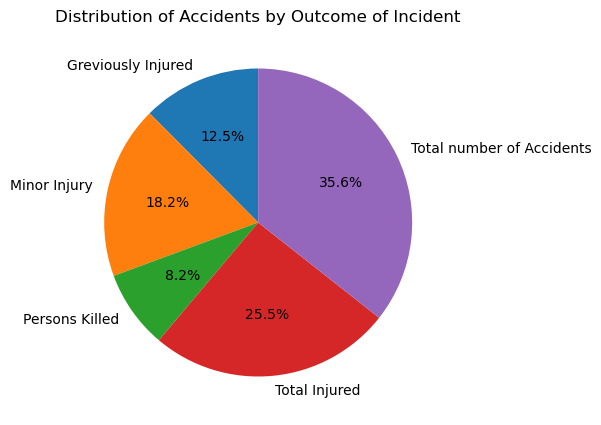

In [204]:
# Querying for accidents by Outcome of Incident and plotting it

outcome_accidents = road_accident_df.groupby('Outcome_of_Incident').agg(Total_Accidents = ('Count_in_mil','sum'))

# Plotting in pie chart

plt.figure(figsize = (10,5))
plt.pie(outcome_accidents['Total_Accidents'],labels=outcome_accidents.index,autopct='%1.1f%%',startangle=90)
plt.title("Distribution of Accidents by Outcome of Incident")
plt.show()

* 8.2% of people gets killed from the accidents.
* 25.5% of people gets injured from the accidents.

In [206]:
# Calculating fatality ratio

total_accidents = road_accident_df.groupby('City_Name').agg(Total_Accidents = ('Count_in_mil','sum'))


fatal_accident = road_accident_df[road_accident_df['Outcome_of_Incident'] == 'Persons Killed']\
                    .groupby('City_Name').agg(Persons_killed = ('Count_in_mil','sum'))

fatality_ratio = (fatal_accident['Persons_killed']/total_accidents['Total_Accidents']).reset_index(name = 'Fatality_Ratio')\
                    .sort_values(by = 'Fatality_Ratio',ascending = False)

fatality_ratio.round(2)

,City_Name,Fatality_Ratio
30,Ludhiana,0.27
4,Asansol Durgapur,0.26
3,Amritsar,0.24
0,Agra,0.20
12,Dhanbad,0.19
37,Patna,0.18
33,Meerut,0.18
23,Kanpur,0.18
47,Varanasi,0.17
21,Jodhpur,0.17


* Ludhiana has the highest fatality ratio around 0.27 followed by Asansol Durgapur 0.26 and Amritsar 0.24.
* Kochi has the least fatality ratio around 0.02.

### Analysis

* Road features is the most frequent cause of accidents which includes sub features like bridge,culvert,curv road,ongoing road works.
* Chennai has maximum number of accidents and Mumbai has the least number of accidents.
* Although Chennai has maximum number of accidents but Delhi has maximum number of deaths follwed by Chennai.
* Although Mumbai has least number of accidents, Srinagar has least number of deaths.
* Main cause when average accidents happen is due to Weather and not vehicle impact.
* Ludhiana has the highest fatality ratio but Delhi has maximum deaths.